https://www.kaggle.com/datasets/howisusmanali/house-prices-2023-dataset?select=For_EDA_dataset.csv

Regresion Lineal Multiclase:Nos ayudan a analizar la relacion entre una variable dependiente y dos o mas variables independientes, explorando como varias variables independites se relacionan conjuntamente con las variables dependientes.

una de sus utilidadesseria la prediccion. La cual mediante regresion lineal podemos utilizar para poder predecir las variables dependientes de un cierto grupo de variables independientes, esto lo aremos utilizando un dataset (link encabezado). el cual tiene ciertas caracteisticas de datos con precios de casas esto nos ayudara a demostrar como podemos calcular el precio de una casa con ciertas características


In [ ]:
# utilizado para manejos de directorios y rutas
import os
#impotamos la libreria de pandas para el manejo de los datos:
import pandas as pd
# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

from sklearn.preprocessing import LabelEncoder


importamos el dataset que se encuentra en un archivo csv (House_Price_dataset.csv)

In [ ]:
datos =pd.read_csv('House_Price_dataset.csv', delimiter=',')
datos

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,8.0,5-10 Marla
168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,7.8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,7.8,5-10 Marla


vemos de que tipo son las columnas que tiene el dataset para poder trabajar con este

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

Eliminamos las columnas que concideremos que no sean necesarios, como datos unicos, enlaces o ids

In [ ]:
columnas_eiliminar = ['property_id', 'location_id','page_url']
data = datos.drop(columnas_eiliminar, axis=1)

In [ ]:
data

,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168442,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,8.0,5-10 Marla
168443,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168444,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,7.8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,7.8,5-10 Marla


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  168446 non-null  object 
 1   price          168446 non-null  int64  
 2   location       168446 non-null  object 
 3   city           168446 non-null  object 
 4   province_name  168446 non-null  object 
 5   latitude       168446 non-null  float64
 6   longitude      168446 non-null  float64
 7   baths          168446 non-null  int64  
 8   area           168446 non-null  object 
 9   purpose        168446 non-null  object 
 10  bedrooms       168446 non-null  int64  
 11  date_added     168446 non-null  object 
 12  agency         124375 non-null  object 
 13  agent          124374 non-null  object 
 14  Area Type      168446 non-null  object 
 15  Area Size      168446 non-null  float64
 16  Area Category  168446 non-null  object 
dtypes: float64(3), int64(3), obje

despues categorizamos las columas que tengan tipo objeto porq no se puede trabajar con palabras en regresiones lineales ya que se aran calculos matemáticos

In [ ]:
dat=data[['price','property_type','location','city','province_name','latitude','longitude','baths','area','purpose','bedrooms','date_added','agency','agent','Area Type','Area Size','Area Category']]

In [ ]:
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [ ]:
#Procesamiento de frases
for columna in columnas_categoricas:
  le = LabelEncoder()
  dat[columna] = le.fit_transform(data[columna])

In [ ]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   price          168446 non-null  int64  
 1   property_type  168446 non-null  int64  
 2   location       168446 non-null  int64  
 3   city           168446 non-null  int64  
 4   province_name  168446 non-null  int64  
 5   latitude       168446 non-null  float64
 6   longitude      168446 non-null  float64
 7   baths          168446 non-null  int64  
 8   area           168446 non-null  int64  
 9   purpose        168446 non-null  int64  
 10  bedrooms       168446 non-null  int64  
 11  date_added     168446 non-null  int64  
 12  agency         168446 non-null  int64  
 13  agent          168446 non-null  int64  
 14  Area Type      168446 non-null  int64  
 15  Area Size      168446 non-null  float64
 16  Area Category  168446 non-null  int64  
dtypes: float64(3), int64(14)
memo

In [ ]:
dat

,price,property_type,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,10000000,1,488,1,0,33.679890,73.012640,2,219,1,2,11,5761,10598,1,4.0,0
1,6900000,1,415,1,0,33.700993,72.971492,3,257,1,3,36,5761,10598,1,5.6,13
2,16500000,2,493,1,0,33.631486,72.926559,6,309,1,5,82,5761,10598,1,8.0,13
3,43500000,2,211,1,0,33.707573,73.151199,4,153,1,4,28,5761,10598,0,2.0,1
4,7000000,2,351,1,0,33.492591,73.301339,3,309,1,3,75,1892,6262,1,8.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,26500000,2,505,2,2,25.029909,67.137192,0,338,1,6,83,814,8611,1,9.6,13
168442,12500000,2,505,2,2,25.017951,67.136393,0,309,1,3,83,814,8611,1,8.0,13
168443,27000000,2,505,2,2,25.015384,67.116330,0,338,1,6,83,814,8611,1,9.6,13
168444,11000000,2,505,2,2,25.013265,67.120818,0,305,1,3,83,814,8611,1,7.8,13


una vez tratados los datos procedeos a identificar las variables intepentientes(X) y las variables dependientes(Y), que serian en este caso las x serian las carcateristicas de la caso y las Y los precios, tambien definermos n y m que m es la cantidad de variables que tenemos para utilizar y n la cantidad de variables x que tenemos

In [ ]:
X = dat.iloc[:, 1:]
y = dat.iloc[:, 0]
m = y.size
print(X.shape)
print(y.shape)
print(X)
print('---'*20)
print(y)

(168446, 16)
(168446,)
        property_type  location  city  province_name   latitude  longitude  \
0                   1       488     1              0  33.679890  73.012640   
1                   1       415     1              0  33.700993  72.971492   
2                   2       493     1              0  33.631486  72.926559   
3                   2       211     1              0  33.707573  73.151199   
4                   2       351     1              0  33.492591  73.301339   
...               ...       ...   ...            ...        ...        ...   
168441              2       505     2              2  25.029909  67.137192   
168442              2       505     2              2  25.017951  67.136393   
168443              2       505     2              2  25.015384  67.116330   
168444              2       505     2              2  25.013265  67.120818   
168445              2       201     2              2  25.113565  67.353811   

        baths  area  purpose  bedrooms  

Una vez identificadas las variables procedemos a normalizar las variables independientes, para que los datos tengan una medida de 0 y una desviacion estandar de uno, esto nos ayuda para calculos para el gradiente o distancias

In [ ]:
def  featureNormalize(X): #recibimos la x
    X_norm = X.copy() #se realiza una copia de la matriz de entrada X para no modificar los datos originales
    mu = np.zeros(X.shape[1])#Calcula la media de cada columna y lo almacena en mu, se calcula a lo largo de cada caracteristica( largo de fila)
    sigma = np.zeros(X.shape[1])#Calcula la desviacion estandar decada columna y se guarda en sigma, se calcula para cada carateristica(largo de fila)

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma #normaliza restando la media de X y dividiendo por la desviacion, esto centra los puntos alrededor de cero y los escala para
                              #aue tengan una desviacion estadar
    return X_norm, mu, sigma #retorna la matriz normalizada, el vector de medias y el vetor de desviaciones

In [ ]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)
#se muestra las X las medias, desviaciones estandar y la X nomalizada
print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

        property_type  location  city  province_name   latitude  longitude  \
0                   1       488     1              0  33.679890  73.012640   
1                   1       415     1              0  33.700993  72.971492   
2                   2       493     1              0  33.631486  72.926559   
3                   2       211     1              0  33.707573  73.151199   
4                   2       351     1              0  33.492591  73.301339   
...               ...       ...   ...            ...        ...        ...   
168441              2       505     2              2  25.029909  67.137192   
168442              2       505     2              2  25.017951  67.136393   
168443              2       505     2              2  25.015384  67.116330   
168444              2       505     2              2  25.013265  67.120818   
168445              2       201     2              2  25.113565  67.353811   

        baths  area  purpose  bedrooms  date_added  agency  age

SE añade una columna de 1 a los terminos independientes, esto nos permitira incluir el termino de interseccion en el modelo y permitir que el modelo ajuste una linea que no pase necesariamente por el origen

In [ ]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [ ]:
print(X)

[[ 1.         -0.91313171 -0.23587855 ...  0.47187904 -0.3274639
  -0.83922161]
 [ 1.         -0.91313171 -0.43177362 ...  0.47187904 -0.05056634
   1.3815897 ]
 [ 1.         -0.12862571 -0.22246108 ...  0.47187904  0.36478
   1.3815897 ]
 ...
 [ 1.         -0.12862571 -0.19025915 ...  0.47187904  0.64167756
   1.3815897 ]
 [ 1.         -0.12862571 -0.19025915 ...  0.47187904  0.3301678
   1.3815897 ]
 [ 1.         -0.12862571 -1.00604135 ...  0.47187904  0.60706536
   1.3815897 ]]


Luego definimos la funcion de costo mediante la formula del error cuadraico(MSE), que calculara el costo o error cuadratico medio entre las predicciones del modelo y las etiquetas del conjunto de entrenamiento

In [ ]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0 #se almacenara el costo o error cuadratico

    h = np.dot(X, theta) #se calcula las predicciones

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y)) #se calcula el costo con la formula
    #se toma la diferencia entre las predicciones(X,theta), y las Y, se eleva al cuadrado cada elemento y se multiplica por 1/(2*m) obtneiendo el costo promedio
    return J #se retorna el valor del costo calculado

Se implementa el algoritmo del descenso por el gradiente,que es un algoritmo de optimizacion que ajusta los parametors del modelo para minimizar la funcion de costo(error medio calculado) y asi lograr una aproximacion a los datos del entrenamiento

In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = [] #se almacenara los valores del costo permitira ver como disminuye el costo

    for i in range(num_iters):
        #se actualizael theta con la formula del desenso por el gradiente
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        #se calcula el coste para hacer un seguimiento
        J_history.append(computeCostMulti(X, y, theta))
    return theta, J_history #devuelve el vector con parametros actualizados, lista de costos

Finalmente entrenamos el modelo y hacemos pruebas para ver si podemos predecir el precio de una casa a partir de ciertas caracateristicas.

theta calculado por el descenso por el gradiente: [ 17764992.86220609    -35830.96604401   -693670.43031188
  -1060556.79466339    757764.69672328   -508375.41139572
  -1117730.39534141   -449247.70877717   1626417.43560054
  12266928.06998747   4447816.17607346  -1104752.5514493
    -36094.43908917  -1187481.88368943 -16973805.03093841
   4847984.67280684   1107586.8792589 ]
El precio predecido para una casa (usando el descenso por el gradiente): $13273517


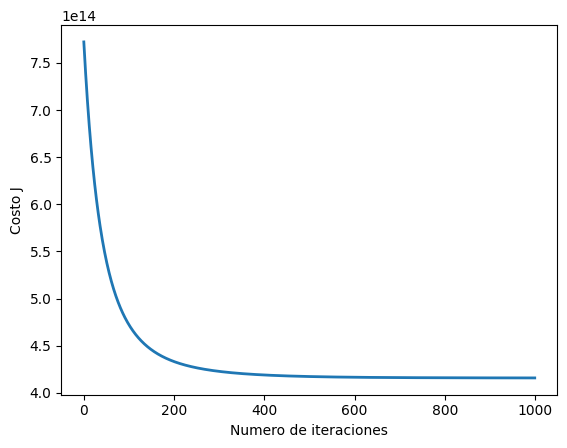

In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01
num_iters = 1000
#estas dos controlaran la velocidad del aprendizaje y el numero de pasos del descenso por el gradiente
# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(17) #aqui se actualizara el descenso por el gradeinte
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters) #se entrena el modelo

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para una casa
X_array = [1, 2, 480,	1, 0,	33.679890, 73.012640,	2,	219,	1,	2,	11,	5761,	10598,	1,	4.0,	0]
#X_array = [1, 1	, 415,	1, 0,	33.700993, 72.971492,	3,	257,	1,	3,	36,	5761,	10598,	1,	5.6,	13]
X_array[1:17] = (X_array[1:17] - mu) / sigma #se normaliza los datos ingresados
price = np.dot(X_array, theta)   # se calcula el precio para dichos valor mandados

print('El precio predecido para una casa (usando el descenso por el gradiente): ${:.0f}'.format(price))